<a href="https://colab.research.google.com/github/UERJ-FISICA/ML4PPGF_UERJ/blob/PPGF-2022-1/Classifica%C3%A7%C3%A3o_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pacotes Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update(
    {'font.size': 18,
     'font.family': 'sans-serif',
     'legend.fontsize': 14,
     'axes.labelsize': 22,
     'xtick.labelsize': 14,
     'ytick.labelsize': 14
    }
    )
import sklearn

### Criando uma amostra de dados
A amostra de dados tem duas variáveis dependentes ($x_1$ e $x_2$). Os dados são classificados com $y = +1$ ou $y = -1$.

In [2]:
x1_min = 0.
x1_max = 5.
x2_min = 0.
x2_max = 5.

def create_dataset( n_data ):
    p0 = 3.0
    p1 = -0.5
    def func_sep( X ):
        return +1 if ( X[1] >= p0 + p1 * X[0] ) else -1

    X = np.c_[
        x1_min + ( x1_max - x1_min ) * np.random.rand( n_data, 1 ),
        x2_min + ( x2_max - x2_min ) * np.random.rand( n_data, 1 )
        ]

    y = np.apply_along_axis( func_sep, 1, X ).astype( np.int32 )

    return ( X, y )

In [3]:
np.random.seed( 42 )
n_data = 50

X_train, y_train = create_dataset( n_data )

In [4]:
df_train = pd.DataFrame( np.c_[ X_train, y_train ], columns=( "x1", "x2", "y_label" ) ).astype( { "y_label": "int32" } )
df_train

,x1,x2,y_label
0,1.872701,4.847923,1
1,4.753572,3.875664,1
2,3.659970,4.697495,1
3,2.993292,4.474137,1
4,0.780093,2.989500,1
5,0.779973,4.609371,1
6,0.290418,0.442463,-1
7,4.330881,0.979914,1
8,3.005575,0.226136,-1
9,3.540363,1.626652,1


[]

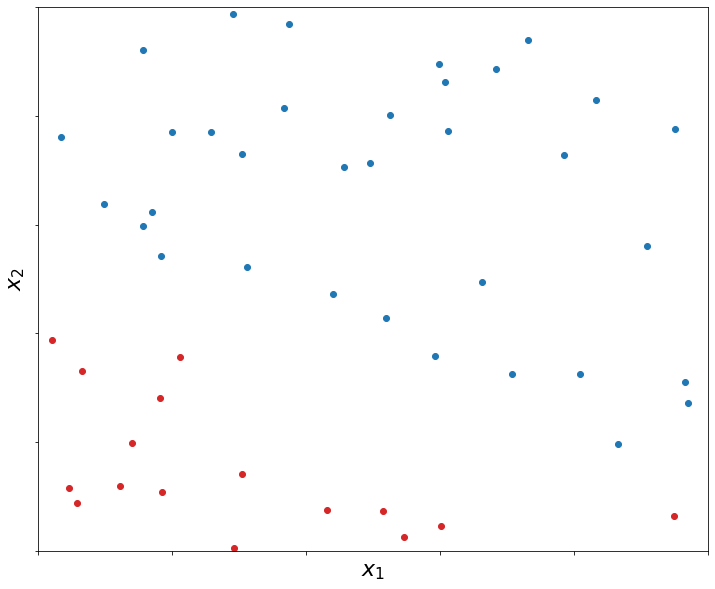

In [5]:
fig = plt.figure( figsize=(12,10) )

msk_sig = ( df_train[ "y_label" ] == +1 )
msk_bkg = ( df_train[ "y_label" ] == -1 )
df_train_sig = df_train[ msk_sig ]
df_train_bkg = df_train[ msk_bkg ]
plt.plot( df_train_sig[ "x1" ], df_train_sig[ "x2" ], 'o', color='tab:blue' )
plt.plot( df_train_bkg[ "x1" ], df_train_bkg[ "x2" ], 'o', color='tab:red' )
# plt.plot( [ x1_min, x1_max ], [ ( p0 + p1 * x1_min ), ( p0 + p1 * x1_max ) ], linestyle='dashed', linewidth=1, color='black' )

plt.xlim( x1_min, x1_max )
plt.ylim( x2_min, x2_max )
plt.xlabel( r'$x_1$' )
plt.ylabel( r'$x_2$' )
plt.gca().xaxis.set_ticklabels( [] )
plt.gca().yaxis.set_ticklabels( [] )

### Determinação dos parâmetros do modelo (treinamento)

$h( \vec{x}; \vec{w} ) = \textrm{sign}( \vec{w}^{T} \cdot \vec{x} )$

$\min_{ \vec{w} } E( \vec{w} )$

$E( \vec{w} ) = \frac{1}{N} \sum_{n=1}^{N} \epsilon_n( \vec{x}_n; \vec{w} )$

$\epsilon_n( \vec{x}_n; \vec{w} ) = \begin{cases} 1 , \quad h( \vec{x}_n; \vec{w} ) = y_n \\ 0 , \quad h( \vec{x}_n; \vec{w} ) \neq y_n \end{cases}$

In [6]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
linear_reg.fit( df_train[ [ "x1", "x2" ] ], df_train[ "y_label" ] )
print ( linear_reg.coef_ )
print ( linear_reg.intercept_ )

[0.21043994 0.46401667]
-1.2563373930328878


### Predições de acordo com o modelo ajustado

In [7]:
df_train[ "y_predict" ] = pd.Series( ( linear_reg.predict( df_train[ [ "x1", "x2" ] ] ) >= 0. ) ).map( { True: +1, False: -1} )
df_train

,x1,x2,y_label,y_predict
0,1.872701,4.847923,1,1
1,4.753572,3.875664,1,1
2,3.659970,4.697495,1,1
3,2.993292,4.474137,1,1
4,0.780093,2.989500,1,1
5,0.779973,4.609371,1,1
6,0.290418,0.442463,-1,-1
7,4.330881,0.979914,1,1
8,3.005575,0.226136,-1,-1
9,3.540363,1.626652,1,1


$E( \vec{w} ) = \frac{1}{N} \sum_{n=1}^{N} \epsilon_n( \vec{x}_n; \vec{w} )$

$\epsilon_n( \vec{x}_n; \vec{w} ) = \begin{cases} 1 , \quad h( \vec{x}_n; \vec{w} ) = y_n \\ 0 , \quad h( \vec{x}_n; \vec{w} ) \neq y_n \end{cases}$

In [15]:
error_train = np.sum( df_train[ "y_label" ] != df_train[ "y_predict" ] ) / df_train.shape[0]
print ( error_train )

0.0


Contorno de classificação do modelo

In [9]:
n_points_ = 500
data_x1_ = np.linspace( x1_min, x1_max, n_points_ )[ : , np.newaxis ]
data_x2_ = np.linspace( x1_min, x1_max, n_points_ )[ : , np.newaxis ]
grid_x1_, grid_x2_ = np.meshgrid( data_x1_, data_x2_ )
datascan_ = np.c_[ grid_x1_.ravel(), grid_x2_.ravel() ]
datascan_predict_ = ( linear_reg.predict( datascan_ ).reshape( grid_x1_.shape ) >= 0. )

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


[]

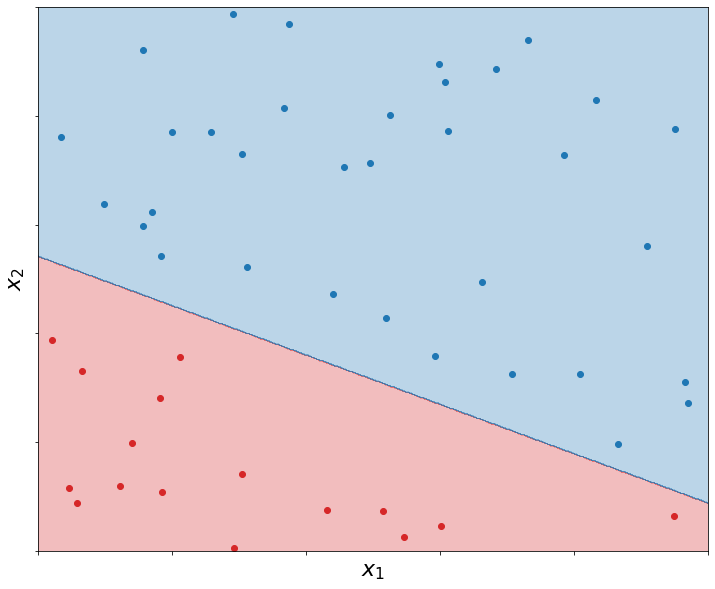

In [10]:
fig = plt.figure( figsize=(12,10) )

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap( ['tab:red','tab:blue'] )
plt.contourf( grid_x1_, grid_x2_, datascan_predict_, cmap=custom_cmap, alpha=0.30 )

msk_sig = ( df_train[ "y_predict" ] == +1 )
msk_bkg = ( df_train[ "y_predict" ] == -1 )
df_train_sig = df_train[ msk_sig ]
df_train_bkg = df_train[ msk_bkg ]
plt.plot( df_train_sig[ "x1" ], df_train_sig[ "x2" ], 'o', color='tab:blue' )
plt.plot( df_train_bkg[ "x1" ], df_train_bkg[ "x2" ], 'o', color='tab:red' )
# plt.plot( [ x1_min, x1_max ], [ ( p0 + p1 * x1_min ), ( p0 + p1 * x1_max ) ], linestyle='dashed', linewidth=1, color='black' )

plt.xlim( x1_min, x1_max )
plt.ylim( x2_min, x2_max )
plt.xlabel( r'$x_1$' )
plt.ylabel( r'$x_2$' )
plt.gca().xaxis.set_ticklabels( [] )
plt.gca().yaxis.set_ticklabels( [] )

### Amostra de teste
O modelo foi otimizado sem olhar para esses dados

In [11]:
np.random.seed( 100 )

X_test, y_test = create_dataset( n_data )
df_test = pd.DataFrame( np.c_[ X_test, y_test ], columns=( "x1", "x2", "y_label" ) ).astype( { "y_label": "int32" } )

[]

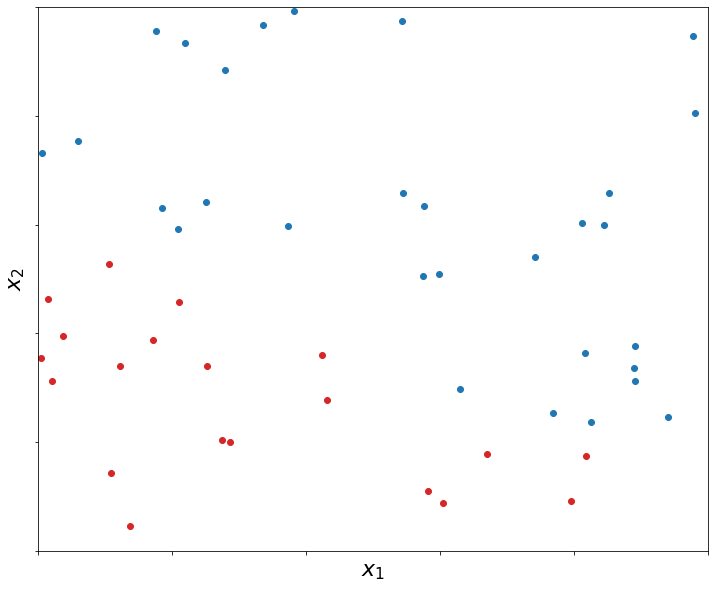

In [12]:
fig = plt.figure( figsize=(12,10) )

msk_sig = ( df_test[ "y_label" ] == +1 )
msk_bkg = ( df_test[ "y_label" ] == -1 )
df_test_sig = df_test[ msk_sig ]
df_test_bkg = df_test[ msk_bkg ]
plt.plot( df_test_sig[ "x1" ], df_test_sig[ "x2" ], 'o', color='tab:blue' )
plt.plot( df_test_bkg[ "x1" ], df_test_bkg[ "x2" ], 'o', color='tab:red' )
# plt.plot( [ x1_min, x1_max ], [ ( p0 + p1 * x1_min ), ( p0 + p1 * x1_max ) ], linestyle='dashed', linewidth=1, color='black' )

plt.xlim( x1_min, x1_max )
plt.ylim( x2_min, x2_max )
plt.xlabel( r'$x_1$' )
plt.ylabel( r'$x_2$' )
plt.gca().xaxis.set_ticklabels( [] )
plt.gca().yaxis.set_ticklabels( [] )

Predição para a amostra de teste usando o modelo ajustado com a amostra de treinamento.

$E( \vec{w} ) = \frac{1}{N} \sum_{n=1}^{N} \epsilon_n( \vec{x}_n; \vec{w} )$

$\epsilon_n( \vec{x}_n; \vec{w} ) = \begin{cases} 1 , \quad h( \vec{x}_n; \vec{w} ) = y_n \\ 0 , \quad h( \vec{x}_n; \vec{w} ) \neq y_n \end{cases}$

In [16]:
df_test[ "y_predict" ] = pd.Series( ( linear_reg.predict( df_test[ [ "x1", "x2" ] ] ) >= 0. ) ).map( { True: +1, False: -1} )
error_test = np.sum( df_test[ "y_label" ] != df_test[ "y_predict" ] ) / df_test.shape[0]
print ( error_test )

0.08


Os pontos laranjas são classificados incorretamente: $h( \vec{x}_n; \vec{w} ) \neq y_n$

[]

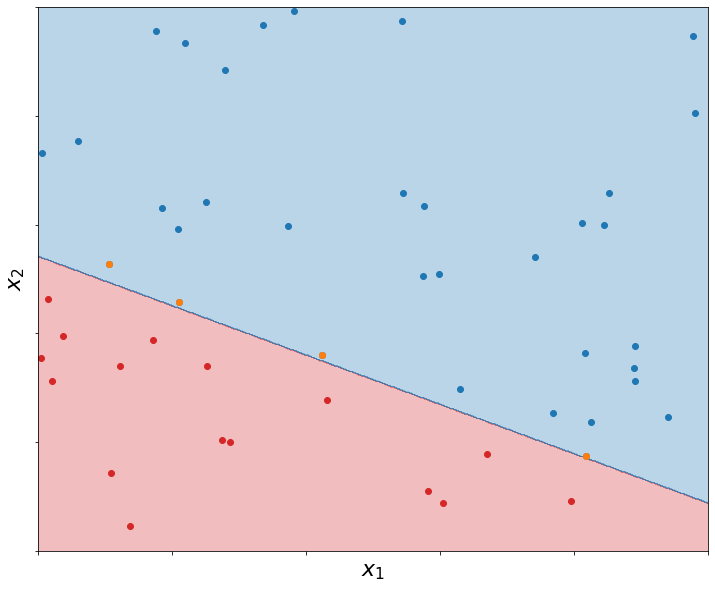

In [14]:
fig = plt.figure( figsize=(12,10) )

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap( ['tab:red','tab:blue'] )
plt.contourf( grid_x1_, grid_x2_, datascan_predict_, cmap=custom_cmap, alpha=0.30 )

msk_sig = ( df_test[ "y_predict" ] == +1 )
msk_bkg = ( df_test[ "y_predict" ] == -1 )
msk_error = ( df_test[ "y_label" ] != df_test[ "y_predict" ] )
df_test_sig = df_test[ msk_sig ]
df_test_bkg = df_test[ msk_bkg ]
df_test_error = df_test[ msk_error ]
plt.plot( df_test_sig[ "x1" ], df_test_sig[ "x2" ], 'o', color='tab:blue' )
plt.plot( df_test_bkg[ "x1" ], df_test_bkg[ "x2" ], 'o', color='tab:red' )
plt.plot( df_test_error[ "x1" ], df_test_error[ "x2" ], 'o', color='tab:orange' )
# plt.plot( [ x1_min, x1_max ], [ ( p0 + p1 * x1_min ), ( p0 + p1 * x1_max ) ], linestyle='dashed', linewidth=1, color='black' )

plt.xlim( x1_min, x1_max )
plt.ylim( x2_min, x2_max )
plt.xlabel( r'$x_1$' )
plt.ylabel( r'$x_2$' )
plt.gca().xaxis.set_ticklabels( [] )
plt.gca().yaxis.set_ticklabels( [] )